# Vizualization of the pre-trained NeF of the Neural Field Arena

The datasets contain overfitted NeF on CIFAR10, MicroImageNet, MNIST and ShapeNet dataset. All relevant information can be found here 
* https://github.com/samuelepapa/neural-field-arena/tree/main
* https://github.com/samuelepapa/fit-a-nef

## Loading of the datasets

The code below demonstrates how to load the datasets.

In [1]:
from data.neural_field_arena_dataset import NeuralFieldArenaDataset
import os

download_url = "https://zenodo.org/records/10392793/files/neural_field_arena.zip"
dir_path = os.path.dirname(os.path.abspath(os.getcwd()))
data_root = os.path.join(dir_path, "adl4cv", "datasets", "neural_field_arena")


mnist = NeuralFieldArenaDataset(data_root, "MNIST", download_url=download_url, data_keys=["params", "labels"])
cifar10 = NeuralFieldArenaDataset(data_root, "CIFAR10", download_url=download_url, data_keys=["params", "labels"])
microimagenet = NeuralFieldArenaDataset(data_root, "MicroImageNet", download_url=download_url, data_keys=["params", "labels"])
shapenet = NeuralFieldArenaDataset(data_root, "MicroImageNet", download_url=download_url, data_keys=["params", "labels"])


In [2]:
mnist[0]["params"][:].std()

0.075588554

## Vizualizsation of the datasets:

The code below demonstrates how to vizualize the NeF.

In [3]:
import numpy as np

MEAN_STD_IMAGE_DATASETS = {
    "MNIST": [np.array([0.13066047]), np.array([0.30810782])],
    "CIFAR10": [
        np.array(
            [
                0.49186882,
                0.48265392,
                0.44717726,
            ]
        ),
        np.array(
            [
                0.24697122,
                0.24338895,
                0.2615926,
            ]
        ),
    ],
    "CelebA": [
        np.array([0.5478978610762312, 0.42231354296134166, 0.3591953807599443]),
        np.array([0.2892034399873768, 0.2524239196548999, 0.24213944150717998]),
    ],
    "ImageNet": [
        np.array([0.4825423682551735, 0.43886259889903234, 0.3864390052222265]),
        np.array([0.2763444786550072, 0.26488767608904246, 0.2720352727653687]),
    ],
    "TinyImageNet": [
        np.array([0.4804297956553372, 0.44819699905135413, 0.39755623178048566]),
        np.array([0.27643974569425867, 0.26888658533363985, 0.2816685219463138]),
    ],
    "STL10": [
        np.array([0.4470306, 0.43970686, 0.40560696]),
        np.array([0.26047868, 0.25662908, 0.27047333]),
    ],
    "MicroImageNet": [
        np.array([0.4643375754356384, 0.4339415729045868, 0.38213176727294923]),
        np.array([0.18949764454628706, 0.18707174788855566, 0.21445986703967326]),
    ],
}


### MNIST

tensor(-0.9347)
tensor(2.4754)
tensor(-0.1573, dtype=torch.float64)
tensor(0.8933, dtype=torch.float64)


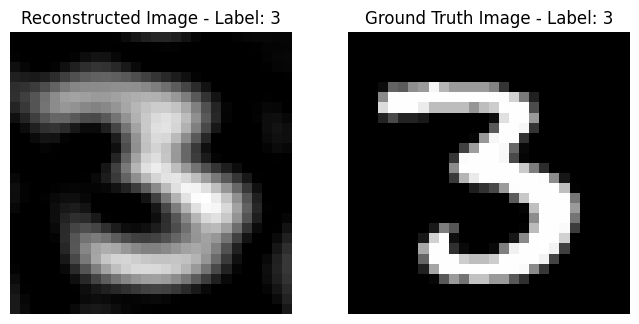

In [5]:
from networks.siren import SIRENPytorch
from networks.siren_util import load_model_pytorch
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
import numpy as np

idx = 12
label = mnist[idx]["labels"]

model = SIRENPytorch(input_dim=2, hidden_dim=32, num_layers=3, output_dim=1, omega_0=9.0)
load_model_pytorch(model, mnist.param_structure, mnist[idx]["params"])

# Assume `model` is your loaded neural field model and is set to evaluation mode
model.eval()

# Step 2: Generate coordinates for each pixel
x = np.linspace(-1, 1, 28)
y = np.linspace(-1, 1, 28)
x, y = np.meshgrid(x, y)
coords = np.stack([x, y], axis=-1)
coords = torch.tensor(coords, dtype=torch.float32)  # Convert to float tensor

# Step 3: Feed coordinates to the model
# Make sure your model can handle the batch size or process them in smaller batches
with torch.no_grad():
    output = model(coords)

mean, std = MEAN_STD_IMAGE_DATASETS["MNIST"]
print(output.min())
print(output.max())
output = output * std + mean
print(output.min())
print(output.max())

output = np.array(np.clip(output, 0, 1) * 255, dtype=np.uint8)

mnist_data = datasets.MNIST(root='./datasets/ground_truth', train=True, download=True, transform=None)
image, label_mnist = mnist_data[idx]  # Get the 21st image and label

# Step 4: Visualize the output and the ground truth
output_image = output # Convert to numpy array for visualization

# Unnormalize ground truth for visualization
ground_truth_image = image

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(output_image, cmap='gray')
axs[0].set_title(f'Reconstructed Image - Label: {label}')
axs[0].axis('off')  # Turn off axis

axs[1].imshow(ground_truth_image, cmap='gray')
axs[1].set_title(f'Ground Truth Image - Label: {label_mnist}')
axs[1].axis('off')  # Turn off axis

plt.show()

### CIFAR10

tensor(-0.5700)
tensor(2.0346)
Files already downloaded and verified


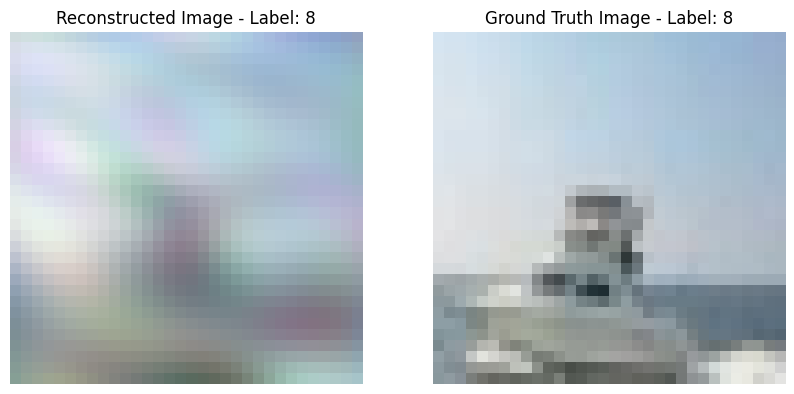

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms



idx = 12
label = cifar10[idx]["labels"]

model = SIRENPytorch(input_dim=2, hidden_dim=32, num_layers=3, output_dim=3, omega_0=9.0)
load_model_pytorch(model, cifar10.param_structure, cifar10[idx]["params"])

# Assume `model` is already loaded and is set to evaluation mode
model.eval()

# Step 2: Generate coordinates for each pixel in a 32x32 image
x = np.linspace(-1, 1, 32)
y = np.linspace(-1, 1, 32)
x, y = np.meshgrid(x, y)
coords = np.stack([x, y], axis=-1)
coords = torch.tensor(coords, dtype=torch.float32)

# Step 3: Feed coordinates to the model
# Make sure your model can handle the batch size or process them in smaller batches
with torch.no_grad():
    output = model(coords)  

mean, std = MEAN_STD_IMAGE_DATASETS["CIFAR10"]
print(output.min())
print(output.max())
output = output * std + mean

output = np.array(np.clip(output, 0, 1) * 255, dtype=np.uint8)

# Step 4: Visualize the output
cifar_data = datasets.CIFAR10(root='./datasets/ground_truth', train=True, download=True, transform=None)
image, label_cifar = cifar_data[idx]
ground_truth_image = image

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(output)
axs[0].set_title(f'Reconstructed Image - Label: {label}')
axs[0].axis('off')  # Turn off axis

axs[1].imshow(ground_truth_image)
axs[1].set_title(f'Ground Truth Image - Label: {label_cifar}')
axs[1].axis('off')  # Turn off axis

plt.show()